# Environment

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple
import gzip
import re

In [33]:
# Set the current working directory
os.chdir('/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_SRRM3')

# Print the current working directory to confirm the change
print(f"Current working directory: {os.getcwd()}")


Current working directory: /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_SRRM3


# Load and explore GTExdata

In [34]:
gencode_tpm_file = "quantification_gencode.tpm.txt.gz"
flair_tpm_file = "quantification_flair_filter.tpm.txt.gz"

In [35]:
# Read TPM data
print("Reading TPM data...")
gencode_tpm_data = pd.read_csv(gencode_tpm_file, sep='\t', compression='gzip')
flair_tpm_data = pd.read_csv(flair_tpm_file, sep='\t', compression='gzip')

Reading TPM data...


In [36]:
gencode_tpm_data.head()

,transcript,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-1211K-0826-SM-7LDFQ,GTEX-1313W-0011-R7b-SM-4ZL3U,GTEX-13QBU-0426-SM-5A4VT,GTEX-13QJ3-0726-SM-7LDHS,GTEX-13QJ3-0726-SM-7LDHS_rep,GTEX-13RTJ-0011-R7b-SM-5CTCB,...,GTEX-QV44-0008-SM-3QNG7_ctrl2,GTEX-QV44-0008-SM-3QNG7_exp,GTEX-S4Z8-0008-SM-2Y983_ctrl,GTEX-S4Z8-0008-SM-2Y983_exp1,GTEX-S4Z8-0008-SM-2Y983_exp2,GTEX-S95S-0008-SM-3RQ8B_ctrl,GTEX-S95S-0008-SM-3RQ8B_exp1,GTEX-S95S-0008-SM-3RQ8B_exp2,GTEX-WY7C-0008-SM-3NZB5_ctrl,GTEX-WY7C-0008-SM-3NZB5_exp
0,ENST00000000233.9,445.582957,595.699690,324.724351,183.727393,243.412895,130.607375,144.857759,147.061501,348.512968,...,158.798331,133.754604,153.531703,131.798542,123.139520,159.059732,127.996825,124.499634,133.120887,134.664477
1,ENST00000000412.7,16.417564,22.936732,8.047105,32.900022,14.752297,11.375481,15.071906,15.056297,8.491312,...,63.896782,97.786980,73.722271,104.406676,120.880079,63.292024,111.346832,116.625298,89.032069,101.841928
2,ENST00000000442.10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENST00000001008.5,81.061724,91.965372,41.655602,27.345472,49.993894,24.436219,48.146365,55.323136,42.087371,...,35.588081,23.603754,21.305060,19.849178,17.623638,42.194683,23.934366,22.558908,35.544473,23.926718
4,ENST00000001146.6,0.000000,0.655335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.396984,0.225944,0.000000,0.000000,0.212820,0.170887,0.306753


In [37]:
transcripts_of_interest = ['ENST00000611745.1', 'ENST00000612155.1']
gencode_tpm_data.loc[gencode_tpm_data['transcript'].isin(transcripts_of_interest)]

,transcript,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-1211K-0826-SM-7LDFQ,GTEX-1313W-0011-R7b-SM-4ZL3U,GTEX-13QBU-0426-SM-5A4VT,GTEX-13QJ3-0726-SM-7LDHS,GTEX-13QJ3-0726-SM-7LDHS_rep,GTEX-13RTJ-0011-R7b-SM-5CTCB,...,GTEX-QV44-0008-SM-3QNG7_ctrl2,GTEX-QV44-0008-SM-3QNG7_exp,GTEX-S4Z8-0008-SM-2Y983_ctrl,GTEX-S4Z8-0008-SM-2Y983_exp1,GTEX-S4Z8-0008-SM-2Y983_exp2,GTEX-S95S-0008-SM-3RQ8B_ctrl,GTEX-S95S-0008-SM-3RQ8B_exp1,GTEX-S95S-0008-SM-3RQ8B_exp2,GTEX-WY7C-0008-SM-3NZB5_ctrl,GTEX-WY7C-0008-SM-3NZB5_exp
139765,ENST00000611745.1,26.67854,100.7032,30.76834,0.0,24.58716,0.421314,0.0,0.0,24.73556,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
139918,ENST00000612155.1,0.00000,0.0000,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.00000,...,0.539213,0.280997,0.0,0.396984,0.0,0.474098,0.0,0.0,0.0,0.0


In [38]:
flair_tpm_data.head()

,transcript,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-1211K-0826-SM-7LDFQ,GTEX-1313W-0011-R7b-SM-4ZL3U,GTEX-13QBU-0426-SM-5A4VT,GTEX-13QJ3-0726-SM-7LDHS,GTEX-13QJ3-0726-SM-7LDHS_rep,GTEX-13RTJ-0011-R7b-SM-5CTCB,...,GTEX-QV44-0008-SM-3QNG7_ctrl2,GTEX-QV44-0008-SM-3QNG7_exp,GTEX-S4Z8-0008-SM-2Y983_ctrl,GTEX-S4Z8-0008-SM-2Y983_exp1,GTEX-S4Z8-0008-SM-2Y983_exp2,GTEX-S95S-0008-SM-3RQ8B_ctrl,GTEX-S95S-0008-SM-3RQ8B_exp1,GTEX-S95S-0008-SM-3RQ8B_exp2,GTEX-WY7C-0008-SM-3NZB5_ctrl,GTEX-WY7C-0008-SM-3NZB5_exp
0,000187c4-a488-40f0-a69c-0a89582f3241_ENSG00000...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.334328,0.358385,0.420881,0.971980,0.000000,0.000000,0.000000,0.262969,0.000000,0.397173
1,00026598-3078-4e2f-8ac9-dd8f523396b9_ENSG00000...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.358385,0.000000,0.000000,0.278141,0.294667,0.000000,0.262969,0.000000,0.397173
2,0002a5e2-f01a-4690-a7db-7af726712a5e_ENSG00000...,0.380702,5.359084,1.961873,4.590649,1.793796,7.308494,6.346269,2.378808,0.653233,...,8.692515,12.185087,7.154979,12.635743,10.013078,14.144038,13.873059,13.937337,1.727199,11.518015
3,000339f1-1769-4608-b369-59aa222cd7b7_ENSG00000...,0.000000,0.297727,0.000000,1.020144,0.000000,0.000000,0.000000,0.000000,1.959698,...,0.668655,0.358385,0.420881,0.971980,1.112564,0.294667,0.867066,0.525937,0.431800,1.191519
4,0003706a-94a7-4419-a61d-6310d7a9c10c_ENSG00000...,14.847375,18.459067,17.656857,4.080577,10.762776,13.288171,15.577205,11.418279,11.104956,...,5.683568,7.167698,6.313216,10.691783,6.397244,7.366687,6.936529,9.203902,9.067796,7.149113


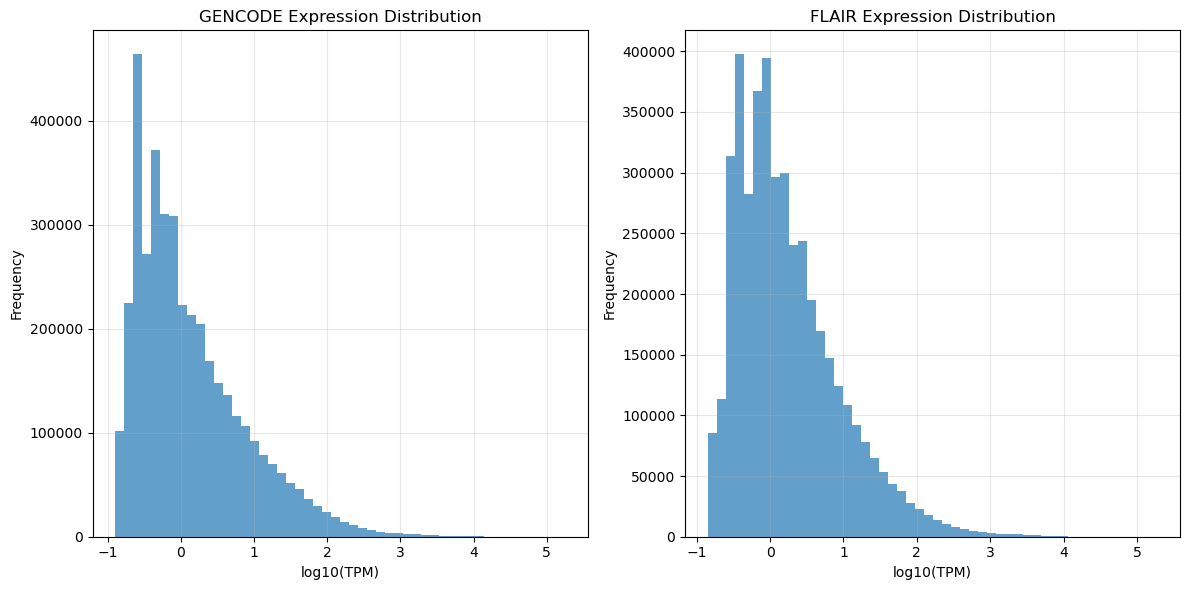


Summary Statistics:

GENCODE TPM:
Mean: 23.34
Median: 0.85
Std: 479.91

FLAIR TPM:
Mean: 21.50
Median: 1.19
Std: 425.27


In [39]:
# Create histograms of gene expression levels
plt.figure(figsize=(12, 6))

# Plot histogram for GENCODE TPM data
plt.subplot(1, 2, 1)
gencode_expr = gencode_tpm_data.iloc[:, 1:].values.flatten()  # Exclude transcript column
gencode_expr = gencode_expr[gencode_expr > 0]  # Filter out zeros
plt.hist(np.log10(gencode_expr), bins=50, alpha=0.7)
plt.xlabel('log10(TPM)')
plt.ylabel('Frequency')
plt.title('GENCODE Expression Distribution')
plt.grid(True, alpha=0.3)

# Plot histogram for FLAIR TPM data  
plt.subplot(1, 2, 2)
flair_expr = flair_tpm_data.iloc[:, 1:].values.flatten()  # Exclude transcript column
flair_expr = flair_expr[flair_expr > 0]  # Filter out zeros
plt.hist(np.log10(flair_expr), bins=50, alpha=0.7)
plt.xlabel('log10(TPM)')
plt.ylabel('Frequency') 
plt.title('FLAIR Expression Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("\nGENCODE TPM:")
print(f"Mean: {np.mean(gencode_expr):.2f}")
print(f"Median: {np.median(gencode_expr):.2f}")
print(f"Std: {np.std(gencode_expr):.2f}")

print("\nFLAIR TPM:") 
print(f"Mean: {np.mean(flair_expr):.2f}")
print(f"Median: {np.median(flair_expr):.2f}")
print(f"Std: {np.std(flair_expr):.2f}")


In [40]:
print(gencode_tpm_data.shape)
print(flair_tpm_data.shape)

(149837, 93)
(93630, 93)


In [41]:
flair_filter_transcripts_file = "flair_filter_transcripts.gtf.gz"
flair_filter_transcripts_data = pd.read_csv(flair_filter_transcripts_file, sep='\t', compression='gzip')
flair_filter_transcripts_data.head()

,chr10,FLAIR,transcript,628638,631255,.,+,..1,"gene_id ""chr10:628000""; transcript_id ""dfe30c5c-ddd7-4ee8-a9ba-74556bd9dd87_chr10:628000"";"
0,chr10,FLAIR,exon,628638,631255,.,+,0,"gene_id ""chr10:628000""; transcript_id ""dfe30c5..."
1,chr10,FLAIR,transcript,649948,652656,.,+,.,"gene_id ""chr10:649000""; transcript_id ""01252fd..."
2,chr10,FLAIR,exon,649948,652656,.,+,0,"gene_id ""chr10:649000""; transcript_id ""01252fd..."
3,chr10,FLAIR,transcript,3069219,3070244,.,-,.,"gene_id ""chr10:3069000""; transcript_id ""5d7057..."
4,chr10,FLAIR,exon,3069219,3070244,.,-,0,"gene_id ""chr10:3069000""; transcript_id ""5d7057..."


# Search for SRRM3 transcripts in FLAIR data

In [42]:
class FlairSRRM3Analyzer:
    def __init__(self, flair_gtf: str, flair_tpm: str):
        """
        Initialize analyzer with FLAIR GTF and TPM file paths
        """
        self.flair_gtf = flair_gtf
        self.flair_tpm = flair_tpm
        self.srrm3_region = "chr7"
        # Exon 15 characteristics
        self.exon15_length = 79  # c.1783-1785 suggests a 3bp exon
        self.exon15_phase = (2, 0)  # start phase 2, end phase 0
        
    def get_exon_phases(self, exons: List[dict]) -> List[Tuple[int, int]]:
        """Calculate phase for each exon"""
        phases = []
        current_phase = 0
        
        for exon in exons:
            length = exon['length']
            end_phase = (current_phase + length) % 3
            phases.append((current_phase, end_phase))
            current_phase = end_phase
            
        return phases
    
    def has_exon15_characteristics(self, exon: dict, prev_phase: int) -> bool:
        """
        Check if an exon matches exon 15 characteristics
        - Should be relatively small (around 79 bp)
        - Should have specific phase pattern
        """
        length = exon['length']
        # Allow some flexibility in length
        if abs(length - self.exon15_length) > 10:
            return False
            
        # Calculate phases
        end_phase = (prev_phase + length) % 3
        return (prev_phase, end_phase) == self.exon15_phase
    
    def parse_flair_gtf(self) -> Dict[str, dict]:
        """
        Parse FLAIR GTF file to find SRRM3 transcripts
        """
        print("Parsing FLAIR GTF file...")
        current_transcript = None
        current_exons = []
        transcript_info = {}
        
        opener = gzip.open if self.flair_gtf.endswith('.gz') else open
        
        with opener(self.flair_gtf, 'rt') as f:
            for line in f:
                if line.startswith('#'):
                    continue
                    
                fields = line.strip().split('\t')
                if len(fields) < 9:
                    continue
                
                chrom, source, feature_type, start, end, score, strand, frame, attributes = fields
                start, end = int(start), int(end)
                
                # Parse attributes
                attr_dict = {}
                for attr in attributes.strip(';').split('; '):
                    key, value = attr.split(' ', 1)
                    attr_dict[key] = value.strip('"')
                
                if chrom != self.srrm3_region:
                    continue
                
                if feature_type == 'transcript':
                    # Process previous transcript
                    if current_transcript and current_exons:
                        # Calculate phases for all exons
                        phases = self.get_exon_phases(current_exons)
                        
                        # Check for exon 15-like characteristics
                        has_exon15 = False
                        exon15_index = None
                        for i in range(1, len(current_exons)-1):  # Skip first and last exon
                            if self.has_exon15_characteristics(current_exons[i], phases[i][0]):
                                has_exon15 = True
                                exon15_index = i
                                break
                        
                        transcript_info[current_transcript] = {
                            'exons': current_exons.copy(),
                            'length': sum(e['length'] for e in current_exons),
                            'strand': strand,
                            'gene_id': attr_dict['gene_id'],
                            'has_exon15': has_exon15,
                            'exon15_index': exon15_index
                        }
                    
                    # Start new transcript
                    current_transcript = attr_dict['transcript_id']
                    current_exons = []
                    
                elif feature_type == 'exon' and current_transcript:
                    exon_length = end - start + 1
                    current_exons.append({
                        'start': start,
                        'end': end,
                        'length': exon_length
                    })
        
        return transcript_info

In [43]:
def classify_transcripts(transcript_info: Dict[str, dict], 
                        min_length: int = 3600, 
                        max_length: int = 3800) -> Tuple[List[str], List[str]]:
    """
    Classify transcripts with strict criteria:
    - Length between 3600-3800 bp
    - Without exon 15: must have exactly 15 exons
    - With exon 15: must have exactly 16 exons
    
    Parameters:
    transcript_info: Dictionary containing transcript information
    min_length: Minimum acceptable transcript length
    max_length: Maximum acceptable transcript length
    
    Returns:
    Tuple of (transcripts_with_exon15, transcripts_without_exon15)
    """
    with_exon15 = []
    without_exon15 = []
    
    # Tracking for detailed filtering statistics
    stats = {
        'total': len(transcript_info),
        'length_filtered': 0,
        'with_exon15': {
            'total': 0,
            'correct_exon_count': 0
        },
        'without_exon15': {
            'total': 0,
            'correct_exon_count': 0
        }
    }
    
    for transcript_id, info in transcript_info.items():
        # First check length
        if not (min_length <= info['length'] <= max_length):
            continue
        
        stats['length_filtered'] += 1
        exon_count = len(info['exons'])
        
        if info['has_exon15']:
            stats['with_exon15']['total'] += 1
            if exon_count == 16:  # Must have exactly 16 exons
                stats['with_exon15']['correct_exon_count'] += 1
                with_exon15.append({
                    'transcript_id': transcript_id,
                    'length': info['length'],
                    'exon_count': exon_count,
                    'exon15_index': info['exon15_index']
                })
        else:
            stats['without_exon15']['total'] += 1
            if exon_count == 15:  # Must have exactly 15 exons
                stats['without_exon15']['correct_exon_count'] += 1
                without_exon15.append({
                    'transcript_id': transcript_id,
                    'length': info['length'],
                    'exon_count': exon_count
                })
    
    # Print detailed filtering report
    print("\nTranscript Filtering Report")
    print("=" * 50)
    print(f"Total transcripts analyzed: {stats['total']}")
    print(f"Transcripts within length range ({min_length}-{max_length} bp): {stats['length_filtered']}")
    print("\nIsoform without exon 15 (should have 15 exons):")
    print(f"- Total candidates: {stats['without_exon15']['total']}")
    print(f"- Matching all criteria: {stats['without_exon15']['correct_exon_count']}")
    print("\nIsoform with exon 15 (should have 16 exons):")
    print(f"- Total candidates: {stats['with_exon15']['total']}")
    print(f"- Matching all criteria: {stats['with_exon15']['correct_exon_count']}")
    
    # Print detailed information about matching transcripts
    print("\nMatching Transcripts Details")
    print("=" * 50)
    
    print("\nTranscripts WITH exon 15 (16 exons):")
    print("-" * 40)
    for transcript in with_exon15:
        print(f"Transcript ID: {transcript['transcript_id']}")
        print(f"Length: {transcript['length']} bp")
        print(f"Exon count: {transcript['exon_count']}")
        print(f"Exon 15 index: {transcript['exon15_index']}")
        print("-" * 40)
    
    print("\nTranscripts WITHOUT exon 15 (15 exons):")
    print("-" * 40)
    for transcript in without_exon15:
        print(f"Transcript ID: {transcript['transcript_id']}")
        print(f"Length: {transcript['length']} bp")
        print(f"Exon count: {transcript['exon_count']}")
        print("-" * 40)
    
    # Return just the transcript IDs in the final tuple
    return (
        [t['transcript_id'] for t in with_exon15],
        [t['transcript_id'] for t in without_exon15]
    )

In [44]:
# File paths
flair_gtf = "flair_filter_transcripts.gtf.gz"
flair_tpm = "quantification_flair_filter.tpm.txt.gz"

# Initialize analyzer
analyzer = FlairSRRM3Analyzer(flair_gtf, flair_tpm)

# Find and classify transcripts
transcript_info = analyzer.parse_flair_gtf()

# Classify transcripts with length filtering
transcript_sets = classify_transcripts(
    transcript_info,
    min_length=3600,
    max_length=3800
)

Parsing FLAIR GTF file...

Transcript Filtering Report
Total transcripts analyzed: 4509
Transcripts within length range (3600-3800 bp): 92

Isoform without exon 15 (should have 15 exons):
- Total candidates: 75
- Matching all criteria: 3

Isoform with exon 15 (should have 16 exons):
- Total candidates: 17
- Matching all criteria: 2

Matching Transcripts Details

Transcripts WITH exon 15 (16 exons):
----------------------------------------
Transcript ID: ENST00000393651.7
Length: 3649 bp
Exon count: 16
Exon 15 index: 2
----------------------------------------
Transcript ID: 1f0c7d06-7428-4e28-b47d-434d45ce9afd_ENSG00000122786.19
Length: 3632 bp
Exon count: 16
Exon 15 index: 1
----------------------------------------

Transcripts WITHOUT exon 15 (15 exons):
----------------------------------------
Transcript ID: 3a2bcee8-a7e1-4b6b-bd46-2b687479204a_ENSG00000009950.15
Length: 3676 bp
Exon count: 15
----------------------------------------
Transcript ID: fd01dd2c-ee70-4803-be66-1e77bb42b55

# Transcripts WITH exon 15 (16 exons)

----------------------------------------
- Transcript ID: ENST00000393651.7
- Length: 3649 bp
- Exon count: 16
- Exon 15 index: 2
----------------------------------------

# Transcripts WITHOUT exon 15 (15 exons):

----------------------------------------
- Transcript ID: ENST00000462753.5
- Length: 3719 bp
- Exon count: 15
----------------------------------------

# Select transcripts of SRRM3 isoforms

In [45]:
transcript_sets_with_exon15 = transcript_sets[0]
transcript_sets_without_exon15 = transcript_sets[1]

In [46]:
print(transcript_sets_with_exon15)
print(transcript_sets_without_exon15)


['ENST00000393651.7', '1f0c7d06-7428-4e28-b47d-434d45ce9afd_ENSG00000122786.19']
['3a2bcee8-a7e1-4b6b-bd46-2b687479204a_ENSG00000009950.15', 'fd01dd2c-ee70-4803-be66-1e77bb42b556', 'ENST00000462753.5']


In [47]:
with_exon15 = transcript_sets_with_exon15[0]
without_exon15 = transcript_sets_without_exon15[-1]
print(with_exon15)
print(without_exon15)

ENST00000393651.7
ENST00000462753.5


In [48]:
gencode_tpm_data.loc[gencode_tpm_data['transcript'].isin([with_exon15])]
gencode_tpm_data.loc[gencode_tpm_data['transcript'].isin([without_exon15])]

,transcript,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-1211K-0826-SM-7LDFQ,GTEX-1313W-0011-R7b-SM-4ZL3U,GTEX-13QBU-0426-SM-5A4VT,GTEX-13QJ3-0726-SM-7LDHS,GTEX-13QJ3-0726-SM-7LDHS_rep,GTEX-13RTJ-0011-R7b-SM-5CTCB,...,GTEX-QV44-0008-SM-3QNG7_ctrl2,GTEX-QV44-0008-SM-3QNG7_exp,GTEX-S4Z8-0008-SM-2Y983_ctrl,GTEX-S4Z8-0008-SM-2Y983_exp1,GTEX-S4Z8-0008-SM-2Y983_exp2,GTEX-S95S-0008-SM-3RQ8B_ctrl,GTEX-S95S-0008-SM-3RQ8B_exp1,GTEX-S95S-0008-SM-3RQ8B_exp2,GTEX-WY7C-0008-SM-3NZB5_ctrl,GTEX-WY7C-0008-SM-3NZB5_exp
55917,ENST00000462753.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.396984,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
gencode_tpm_data.columns[1:10]

Index(['GTEX-1192X-0011-R10a-SM-4RXXZ', 'GTEX-11H98-0011-R11b-SM-4SFLZ',
       'GTEX-11TTK-0011-R7b-SM-4TVFS', 'GTEX-1211K-0826-SM-7LDFQ',
       'GTEX-1313W-0011-R7b-SM-4ZL3U', 'GTEX-13QBU-0426-SM-5A4VT',
       'GTEX-13QJ3-0726-SM-7LDHS', 'GTEX-13QJ3-0726-SM-7LDHS_rep',
       'GTEX-13RTJ-0011-R7b-SM-5CTCB'],
      dtype='object')

/beegfs/scratch/tmp/ipykernel_69530/2419984267.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, patch_artist=True, labels=['With exon 15\n(16 exons)', 'Without exon 15\n(15 exons)'])


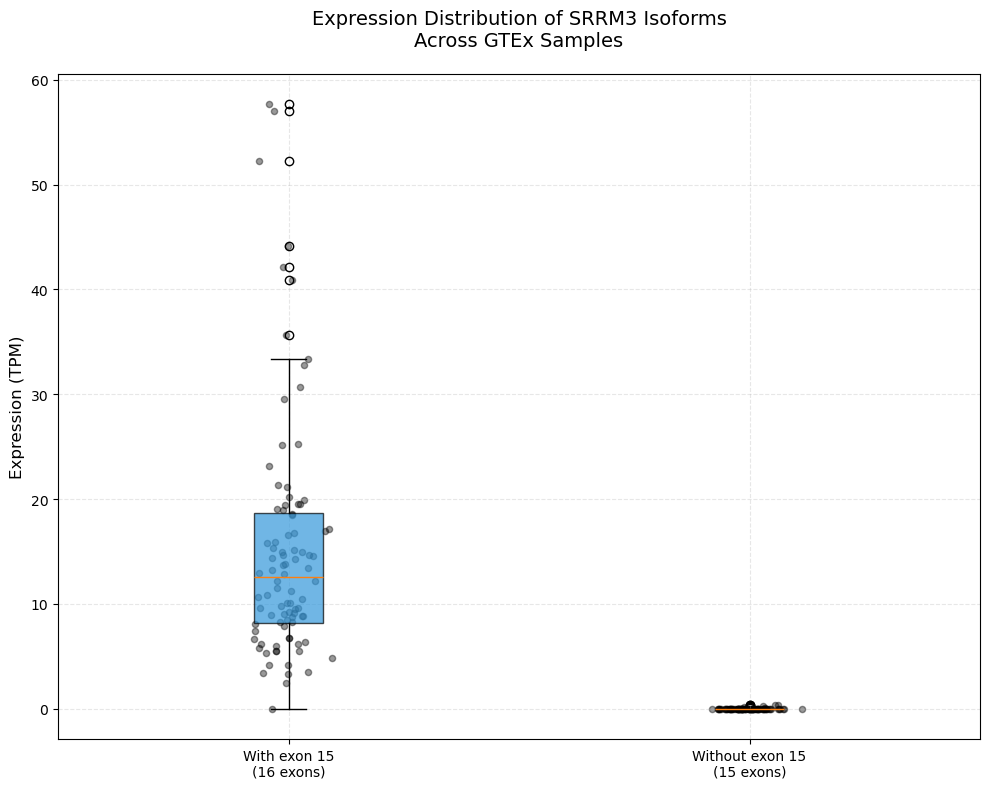


Summary Statistics:

With exon 15:
Mean: 15.28
Median: 12.53
Std: 11.52

Without exon 15:
Mean: 0.01
Median: 0.00
Std: 0.06


In [50]:
# Create a figure and axis with a larger size for better visibility
plt.figure(figsize=(10, 8))

# Get data for both transcripts
with_exon15_data = gencode_tpm_data.loc[gencode_tpm_data['transcript'].isin([with_exon15])].iloc[0]
without_exon15_data = gencode_tpm_data.loc[gencode_tpm_data['transcript'].isin([without_exon15])].iloc[0]

# Get expression values (excluding transcript column) and prepare data for boxplot
with_exon15_expr = with_exon15_data[1:].values
without_exon15_expr = without_exon15_data[1:].values
data = [with_exon15_expr, without_exon15_expr]

# Create boxplot
bp = plt.boxplot(data, patch_artist=True, labels=['With exon 15\n(16 exons)', 'Without exon 15\n(15 exons)'])

# Customize boxplot colors
colors = ['#3498db', '#e74c3c']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Customize plot appearance
plt.ylabel('Expression (TPM)', fontsize=12)
plt.title('Expression Distribution of SRRM3 Isoforms\nAcross GTEx Samples', fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.3)

# Add individual points with jitter for better visualization
for i, d in enumerate(data, 1):
    x = np.random.normal(i, 0.04, size=len(d))
    plt.scatter(x, d, alpha=0.4, s=20, color='black')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("\nWith exon 15:")
print(f"Mean: {np.mean(with_exon15_expr):.2f}")
print(f"Median: {np.median(with_exon15_expr):.2f}")
print(f"Std: {np.std(with_exon15_expr):.2f}")

print("\nWithout exon 15:")
print(f"Mean: {np.mean(without_exon15_expr):.2f}")
print(f"Median: {np.median(without_exon15_expr):.2f}")
print(f"Std: {np.std(without_exon15_expr):.2f}")

In [51]:
transcripts_of_interest

['ENST00000611745.1', 'ENST00000612155.1']

/beegfs/scratch/tmp/ipykernel_69530/1217724695.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, patch_artist=True, labels=['With exon 15\n(16 exons)', 'Without exon 15\n(15 exons)'])


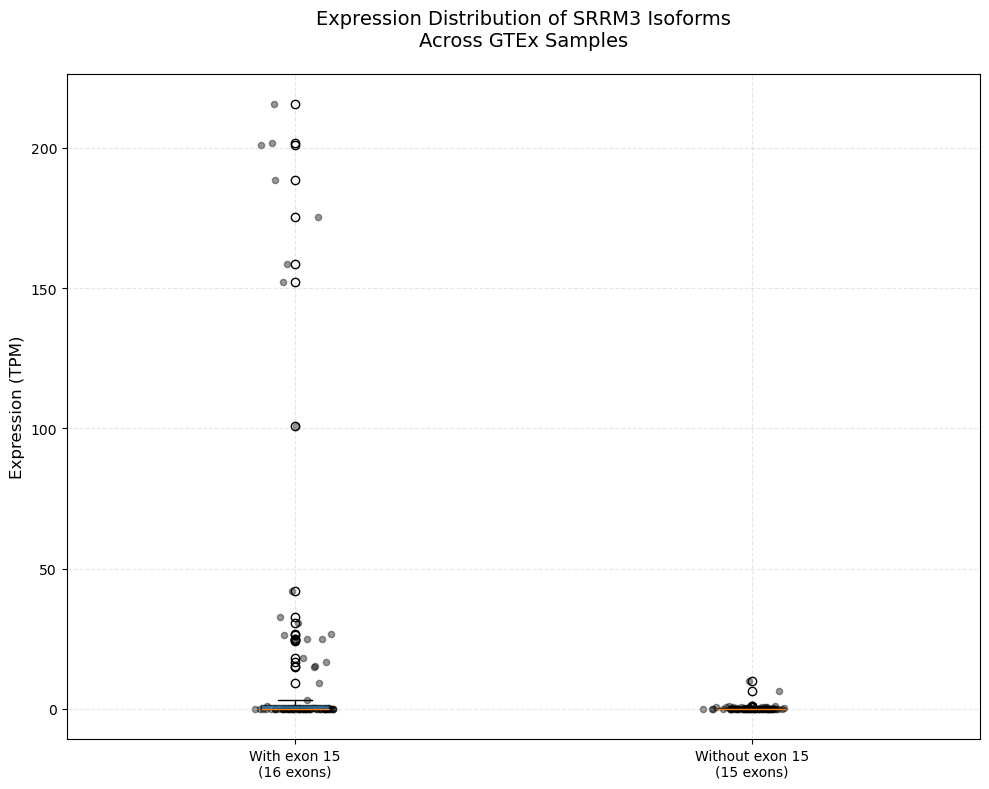


Summary Statistics:

With exon 15:
Mean: 18.81
Median: 0.00
Std: 49.84

Without exon 15:
Mean: 0.30
Median: 0.00
Std: 1.21


In [52]:
# Create a figure and axis with a larger size for better visibility
plt.figure(figsize=(10, 8))

# Get data for both transcripts
with_exon15_data = gencode_tpm_data.loc[gencode_tpm_data['transcript'] == "ENST00000611745.1"].iloc[0]
without_exon15_data = gencode_tpm_data.loc[gencode_tpm_data['transcript'] == "ENST00000612155.1"].iloc[0]

# Get expression values (excluding transcript column) and prepare data for boxplot
with_exon15_expr = with_exon15_data[1:].values
without_exon15_expr = without_exon15_data[1:].values
data = [with_exon15_expr, without_exon15_expr]

# Create boxplot
bp = plt.boxplot(data, patch_artist=True, labels=['With exon 15\n(16 exons)', 'Without exon 15\n(15 exons)'])

# Customize boxplot colors
colors = ['#3498db', '#e74c3c']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Customize plot appearance
plt.ylabel('Expression (TPM)', fontsize=12)
plt.title('Expression Distribution of SRRM3 Isoforms\nAcross GTEx Samples', fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.3)

# Add individual points with jitter for better visualization
for i, d in enumerate(data, 1):
    x = np.random.normal(i, 0.04, size=len(d))
    plt.scatter(x, d, alpha=0.4, s=20, color='black')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("\nWith exon 15:")
print(f"Mean: {np.mean(with_exon15_expr):.2f}")
print(f"Median: {np.median(with_exon15_expr):.2f}")
print(f"Std: {np.std(with_exon15_expr):.2f}")

print("\nWithout exon 15:")
print(f"Mean: {np.mean(without_exon15_expr):.2f}")
print(f"Median: {np.median(without_exon15_expr):.2f}")
print(f"Std: {np.std(without_exon15_expr):.2f}")

In [53]:
gencode_tpm_data.loc[gencode_tpm_data['transcript'].isin(transcripts_of_interest)]

,transcript,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-1211K-0826-SM-7LDFQ,GTEX-1313W-0011-R7b-SM-4ZL3U,GTEX-13QBU-0426-SM-5A4VT,GTEX-13QJ3-0726-SM-7LDHS,GTEX-13QJ3-0726-SM-7LDHS_rep,GTEX-13RTJ-0011-R7b-SM-5CTCB,...,GTEX-QV44-0008-SM-3QNG7_ctrl2,GTEX-QV44-0008-SM-3QNG7_exp,GTEX-S4Z8-0008-SM-2Y983_ctrl,GTEX-S4Z8-0008-SM-2Y983_exp1,GTEX-S4Z8-0008-SM-2Y983_exp2,GTEX-S95S-0008-SM-3RQ8B_ctrl,GTEX-S95S-0008-SM-3RQ8B_exp1,GTEX-S95S-0008-SM-3RQ8B_exp2,GTEX-WY7C-0008-SM-3NZB5_ctrl,GTEX-WY7C-0008-SM-3NZB5_exp
139765,ENST00000611745.1,26.67854,100.7032,30.76834,0.0,24.58716,0.421314,0.0,0.0,24.73556,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
139918,ENST00000612155.1,0.00000,0.0000,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.00000,...,0.539213,0.280997,0.0,0.396984,0.0,0.474098,0.0,0.0,0.0,0.0


# Annotate GTEx tissue types


In [54]:
import pandas as pd

def load_gtex_sample_attributes(file_path):
    """
    Load GTEx sample attributes from a tab-separated file.
    
    Parameters:
    file_path (str): Path to the GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt file
    
    Returns:
    pandas.DataFrame: DataFrame containing the GTEx sample attributes
    """
    # Read the tab-separated file
    # The file has tab-separator and no quoted text
    df = pd.read_csv(file_path, sep='\t', quoting=3)
    
    # Clean up column names (optional)
    # Strip any whitespace from column names
    df.columns = df.columns.str.strip()
    
    # Convert numeric columns to appropriate types
    # List of columns that should be numeric
    numeric_columns = ['SMRIN', 'SMATSSCR', 'SMTSPAX', 'SMNABTCHD', 'SMGEBTCHD',
                      'SME2MPRT', 'SMCHMPRS', 'SMNUMGPS', 'SMMAPRT', 'SMEXNCRT',
                      'SM550NRM', 'SMGNSDTC', 'SMUNMPRT', 'SM350NRM', 'SMRDLGTH',
                      'SMMNCPB', 'SME1MMRT', 'SMSFLGTH', 'SMESTLBS', 'SMMPPD',
                      'SMNTERRT', 'SMRDTTL', 'SMMNCV', 'SMMPPDPR', 'SMCGLGTH',
                      'SMGAPPCT', 'SMUNPDRD', 'SMNTRNRT', 'SMMPUNRT', 'SMEXPEFF',
                      'SMMPPDUN', 'SME2MMRT', 'SME2ANTI', 'SMALTALG', 'SME2SNSE',
                      'SMMFLGTH', 'SME1ANTI', 'SMSPLTRD', 'SMBSMMRT', 'SME1SNSE',
                      'SME1PCTS', 'SMRRNART', 'SME1MPRT', 'SMNUM5CD', 'SMDPMPRT',
                      'SME2PCTS']
    
    # Convert to numeric, errors='coerce' will set invalid parsing to NaN
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Basic data validation
    print(f"Loaded {len(df)} samples with {len(df.columns)} attributes")
    
    return df

def summarize_gtex_data(df):
    """
    Provide a basic summary of the GTEx sample attributes data.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing GTEx sample attributes
    
    Returns:
    dict: Summary statistics about the dataset
    """
    summary = {
        'total_samples': len(df),
        'unique_tissue_types': df['SMTS'].nunique(),
        'unique_detailed_tissues': df['SMTSD'].nunique(),
        'tissue_counts': df['SMTS'].value_counts().to_dict(),
        'missing_values_by_column': df.isnull().sum().to_dict()
    }
    
    return summary

In [55]:
file_path = "GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt"

# Load the data
gtex_df = load_gtex_sample_attributes(file_path)

Loaded 22951 samples with 63 attributes


In [56]:
gtex_df.head()

,SAMPID,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
0,GTEX-1117F-0003-SM-58Q7G,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GTEX-1117F-0003-SM-5DWSB,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GTEX-1117F-0003-SM-6WBT7,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GTEX-1117F-0011-R10a-SM-AHZ7F,NaN,"B1, A1",NaN,NaN,Brain,Brain - Frontal Cortex (BA9),0009834,1193.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GTEX-1117F-0011-R10b-SM-CYKQ8,NaN,"B1, A1",NaN,7.2,Brain,Brain - Frontal Cortex (BA9),0009834,1193.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
gtex_df.SAMPID[:10]

0         GTEX-1117F-0003-SM-58Q7G
1         GTEX-1117F-0003-SM-5DWSB
2         GTEX-1117F-0003-SM-6WBT7
3    GTEX-1117F-0011-R10a-SM-AHZ7F
4    GTEX-1117F-0011-R10b-SM-CYKQ8
5         GTEX-1117F-0226-SM-5GZZ7
6         GTEX-1117F-0426-SM-5EGHI
7         GTEX-1117F-0526-SM-5EGHJ
8         GTEX-1117F-0626-SM-5N9CS
9         GTEX-1117F-0726-SM-5GIEN
Name: SAMPID, dtype: object

In [58]:
# Get summary statistics
summary = summarize_gtex_data(gtex_df)

# Print some basic information
print("\nDataset Summary:")
print(f"Total samples: {summary['total_samples']}")
print(f"Unique tissue types: {summary['unique_tissue_types']}")
print(f"Unique detailed tissue types: {summary['unique_detailed_tissues']}")

print("\nSample counts by tissue type:")
for tissue, count in summary['tissue_counts'].items():
    print(f"{tissue}: {count}")


Dataset Summary:
Total samples: 22951
Unique tissue types: 31
Unique detailed tissue types: 55

Sample counts by tissue type:
Blood: 3480
Brain: 3326
Skin: 2014
Esophagus: 1582
Blood Vessel: 1473
Adipose Tissue: 1327
Heart: 1141
Muscle: 1132
Lung: 867
Colon: 821
Thyroid: 812
Nerve: 722
Breast: 480
Testis: 406
Stomach: 381
Pancreas: 360
Pituitary: 301
Adrenal Gland: 275
Prostate: 262
Spleen: 260
Liver: 251
Bone Marrow: 217
Ovary: 195
Small Intestine: 193
Salivary Gland: 181
Vagina: 173
Uterus: 166
Kidney: 104
Bladder: 21
Cervix Uteri: 19
Fallopian Tube: 9


In [59]:
import pandas as pd
import re

def annotate_rnaseq_samples(rnaseq_sample_names, gtex_df):
    """
    Annotate RNA-seq sample names with tissue types from GTEx annotations using exact matching.
    
    Parameters:
    rnaseq_sample_names (list-like): List of RNA-seq sample names
    gtex_df (pandas.DataFrame): DataFrame containing GTEx sample annotations
    
    Returns:
    pandas.DataFrame: DataFrame with RNA-seq sample names and their tissue annotations
    """
    # Convert sample names to a Series for easier manipulation
    rnaseq_samples = pd.Series(rnaseq_sample_names)
    
    # Create a list to store annotations
    annotations = []
    
    def clean_sample_name(name):
        """Remove potential suffixes while preserving the core sample identifier."""
        return re.sub(r'_rep\d*|_ctrl|_exp\d*$', '', name)
    
    # Process each RNA-seq sample
    for sample in rnaseq_samples:
        # Clean the sample name
        cleaned_sample = clean_sample_name(sample)
        
        # Try to find an exact match (excluding potential suffixes)
        matches = gtex_df[gtex_df['SAMPID'].str.contains(f"^{cleaned_sample}$", regex=True, na=False)]
        
        if len(matches) == 1:
            # Unique exact match found
            match = matches.iloc[0]
            annotations.append({
                'rnaseq_sample': sample,
                'cleaned_sample': cleaned_sample,
                'tissue_type': match['SMTSD'],
                'broad_tissue_type': match['SMTS'],
                'matched_gtex_id': match['SAMPID'],
                'match_type': 'exact'
            })
        else:
            # Try matching without the SM part but including the R-number
            base_pattern = re.match(r'(GTEX-\w+-\d+-R\d+[ab])', cleaned_sample)
            if base_pattern:
                base_matches = gtex_df[gtex_df['SAMPID'].str.contains(base_pattern.group(1), regex=False, na=False)]
                if len(base_matches) == 1:
                    match = base_matches.iloc[0]
                    annotations.append({
                        'rnaseq_sample': sample,
                        'cleaned_sample': cleaned_sample,
                        'tissue_type': match['SMTSD'],
                        'broad_tissue_type': match['SMTS'],
                        'matched_gtex_id': match['SAMPID'],
                        'match_type': 'partial'
                    })
                elif len(base_matches) > 1:
                    annotations.append({
                        'rnaseq_sample': sample,
                        'cleaned_sample': cleaned_sample,
                        'tissue_type': None,
                        'broad_tissue_type': None,
                        'matched_gtex_id': ', '.join(base_matches['SAMPID'].tolist()),
                        'match_type': 'multiple_matches'
                    })
                else:
                    annotations.append({
                        'rnaseq_sample': sample,
                        'cleaned_sample': cleaned_sample,
                        'tissue_type': None,
                        'broad_tissue_type': None,
                        'matched_gtex_id': None,
                        'match_type': 'no_match'
                    })
            else:
                annotations.append({
                    'rnaseq_sample': sample,
                    'cleaned_sample': cleaned_sample,
                    'tissue_type': None,
                    'broad_tissue_type': None,
                    'matched_gtex_id': None,
                    'match_type': 'invalid_format'
                })
    
    # Convert annotations to DataFrame
    result_df = pd.DataFrame(annotations)
    
    # Print summary statistics
    print("\nAnnotation Summary:")
    print(f"Total samples: {len(result_df)}")
    print("\nMatch types:")
    print(result_df['match_type'].value_counts())
    
    if len(result_df[result_df['tissue_type'].notna()]) > 0:
        print("\nTissue types found:")
        print(result_df['tissue_type'].value_counts().dropna())
    
    # Print details about multiple matches
    multiple_matches = result_df[result_df['match_type'] == 'multiple_matches']
    if len(multiple_matches) > 0:
        print("\nSamples with multiple matches:")
        for _, row in multiple_matches.iterrows():
            print(f"\n{row['rnaseq_sample']}:")
            print(f"Matching GTEx IDs: {row['matched_gtex_id']}")
    
    return result_df

In [60]:
sample_names = gencode_tpm_data.columns

# Run annotation
annotated_samples = annotate_rnaseq_samples(sample_names, gtex_df)


Annotation Summary:
Total samples: 93

Match types:
match_type
invalid_format      78
partial             12
multiple_matches     3
Name: count, dtype: int64

Tissue types found:
tissue_type
Brain - Putamen (basal ganglia)             5
Brain - Cerebellar Hemisphere               4
Brain - Frontal Cortex (BA9)                1
Brain - Anterior cingulate cortex (BA24)    1
Brain - Caudate (basal ganglia)             1
Name: count, dtype: int64

Samples with multiple matches:

GTEX-1192X-0011-R10a-SM-4RXXZ:
Matching GTEx IDs: GTEX-1192X-0011-R10a-SM-CYKSL, GTEX-1192X-0011-R10a-SM-DO941

GTEX-14BIL-0011-R10a-SM-5EQV4:
Matching GTEx IDs: GTEX-14BIL-0011-R10a-SM-5SI75, GTEX-14BIL-0011-R10a-SM-AHZ7B, GTEX-14BIL-0011-R10a-SM-CYKOB

GTEX-15DCD-0011-R10b-SM-5S51M:
Matching GTEx IDs: GTEX-15DCD-0011-R10b-SM-6LPII, GTEX-15DCD-0011-R10b-SM-CYKO7


In [61]:
# Display results
print("\nDetailed annotations:")
pd.set_option('display.max_columns', None)
print(annotated_samples[annotated_samples['match_type'].isin(['exact', 'partial'])][['rnaseq_sample', 'tissue_type', 'match_type', 'matched_gtex_id']])


Detailed annotations:
                    rnaseq_sample                               tissue_type  \
2   GTEX-11H98-0011-R11b-SM-4SFLZ             Brain - Cerebellar Hemisphere   
3    GTEX-11TTK-0011-R7b-SM-4TVFS           Brain - Putamen (basal ganglia)   
5    GTEX-1313W-0011-R7b-SM-4ZL3U           Brain - Putamen (basal ganglia)   
9    GTEX-13RTJ-0011-R7b-SM-5CTCB           Brain - Putamen (basal ganglia)   
10  GTEX-13VXU-0011-R11b-SM-5BFQZ             Brain - Cerebellar Hemisphere   
11  GTEX-13X6J-0011-R10b-SM-5CEKT              Brain - Frontal Cortex (BA9)   
12   GTEX-145MH-0011-R3b-SM-5CTCM  Brain - Anterior cingulate cortex (BA24)   
17   GTEX-14C5O-0011-R7b-SM-5GUPO           Brain - Putamen (basal ganglia)   
20   GTEX-15ER7-0011-R5b-SM-5S51V           Brain - Caudate (basal ganglia)   
21   GTEX-15ER7-0011-R7a-SM-5QYP2           Brain - Putamen (basal ganglia)   
23  GTEX-17F97-0011-R11b-SM-63KY2             Brain - Cerebellar Hemisphere   
29  GTEX-1H3NZ-0011-R11b-SM-A

**Tentative matches**

GTEX-1192X-0011-R10a-SM-4RXXZ:
Matching GTEx IDs: `GTEX-1192X-0011-R10a-SM-CYKSL`, `GTEX-1192X-0011-R10a-SM-DO941`     

GTEX-14BIL-0011-R10a-SM-5EQV4:
Matching GTEx IDs: `GTEX-14BIL-0011-R10a-SM-5SI75`, `GTEX-14BIL-0011-R10a-SM-AHZ7B`, `GTEX-14BIL-0011-R10a-SM-CYKOB`

GTEX-15DCD-0011-R10b-SM-5S51M:
Matching GTEx IDs: `GTEX-15DCD-0011-R10b-SM-6LPII`, `GTEX-15DCD-0011-R10b-SM-CYKO7`

In [62]:
# Get rows for GTEX-1192X samples
print("GTEX-1192X matches:")
print(gtex_df[gtex_df['SAMPID'].isin(['GTEX-1192X-0011-R10a-SM-CYKSL', 'GTEX-1192X-0011-R10a-SM-DO941'])][['SAMPID', 'SMTSD', 'SMTS']])
print("\n")

# Get rows for GTEX-14BIL samples  
print("GTEX-14BIL matches:")
print(gtex_df[gtex_df['SAMPID'].isin(['GTEX-14BIL-0011-R10a-SM-5SI75', 'GTEX-14BIL-0011-R10a-SM-AHZ7B', 'GTEX-14BIL-0011-R10a-SM-CYKOB'])][['SAMPID', 'SMTSD', 'SMTS']])
print("\n")

# Get rows for GTEX-15DCD samples
print("GTEX-15DCD matches:")  
print(gtex_df[gtex_df['SAMPID'].isin(['GTEX-15DCD-0011-R10b-SM-6LPII', 'GTEX-15DCD-0011-R10b-SM-CYKO7'])][['SAMPID', 'SMTSD', 'SMTS']])

GTEX-1192X matches:
                            SAMPID                         SMTSD   SMTS
263  GTEX-1192X-0011-R10a-SM-CYKSL  Brain - Frontal Cortex (BA9)  Brain
264  GTEX-1192X-0011-R10a-SM-DO941  Brain - Frontal Cortex (BA9)  Brain


GTEX-14BIL matches:
                             SAMPID                         SMTSD   SMTS
5277  GTEX-14BIL-0011-R10a-SM-5SI75  Brain - Frontal Cortex (BA9)  Brain
5278  GTEX-14BIL-0011-R10a-SM-AHZ7B  Brain - Frontal Cortex (BA9)  Brain
5279  GTEX-14BIL-0011-R10a-SM-CYKOB  Brain - Frontal Cortex (BA9)  Brain


GTEX-15DCD matches:
                             SAMPID                         SMTSD   SMTS
6404  GTEX-15DCD-0011-R10b-SM-6LPII  Brain - Frontal Cortex (BA9)  Brain
6405  GTEX-15DCD-0011-R10b-SM-CYKO7  Brain - Frontal Cortex (BA9)  Brain


In [63]:
multiple_matches_mask = annotated_samples['match_type'] == "multiple_matches"
annotated_samples[multiple_matches_mask].head()

,rnaseq_sample,cleaned_sample,tissue_type,broad_tissue_type,matched_gtex_id,match_type
1,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-1192X-0011-R10a-SM-4RXXZ,None,None,"GTEX-1192X-0011-R10a-SM-CYKSL, GTEX-1192X-0011...",multiple_matches
13,GTEX-14BIL-0011-R10a-SM-5EQV4,GTEX-14BIL-0011-R10a-SM-5EQV4,None,None,"GTEX-14BIL-0011-R10a-SM-5SI75, GTEX-14BIL-0011...",multiple_matches
19,GTEX-15DCD-0011-R10b-SM-5S51M,GTEX-15DCD-0011-R10b-SM-5S51M,None,None,"GTEX-15DCD-0011-R10b-SM-6LPII, GTEX-15DCD-0011...",multiple_matches


In [64]:
annotated_samples.loc[multiple_matches_mask, 'broad_tissue_type'] = "Brain - Frontal Cortex (BA9)"
annotated_samples.loc[multiple_matches_mask, 'tissue_type'] = "Brain"

annotated_samples[multiple_matches_mask].head()


,rnaseq_sample,cleaned_sample,tissue_type,broad_tissue_type,matched_gtex_id,match_type
1,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain,Brain - Frontal Cortex (BA9),"GTEX-1192X-0011-R10a-SM-CYKSL, GTEX-1192X-0011...",multiple_matches
13,GTEX-14BIL-0011-R10a-SM-5EQV4,GTEX-14BIL-0011-R10a-SM-5EQV4,Brain,Brain - Frontal Cortex (BA9),"GTEX-14BIL-0011-R10a-SM-5SI75, GTEX-14BIL-0011...",multiple_matches
19,GTEX-15DCD-0011-R10b-SM-5S51M,GTEX-15DCD-0011-R10b-SM-5S51M,Brain,Brain - Frontal Cortex (BA9),"GTEX-15DCD-0011-R10b-SM-6LPII, GTEX-15DCD-0011...",multiple_matches


In [65]:
annotated_samples.head()

,rnaseq_sample,cleaned_sample,tissue_type,broad_tissue_type,matched_gtex_id,match_type
0,transcript,transcript,None,None,None,invalid_format
1,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain,Brain - Frontal Cortex (BA9),"GTEX-1192X-0011-R10a-SM-CYKSL, GTEX-1192X-0011...",multiple_matches
2,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,Brain,GTEX-11H98-0011-R11b-SM-5NQ6U,partial
3,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),Brain,GTEX-11TTK-0011-R7b-SM-DNZZZ,partial
4,GTEX-1211K-0826-SM-7LDFQ,GTEX-1211K-0826-SM-7LDFQ,None,None,None,invalid_format


In [66]:
print(annotated_samples[~annotated_samples.tissue_type.isna()].shape)
print(annotated_samples[~annotated_samples.broad_tissue_type.isna()].shape)


(15, 6)
(15, 6)


In [67]:
annotated_samples = annotated_samples.dropna()

In [68]:
annotated_samples.shape

(15, 6)

In [69]:
annotated_samples.tissue_type.value_counts()

tissue_type
Brain - Putamen (basal ganglia)             5
Brain - Cerebellar Hemisphere               4
Brain                                       3
Brain - Frontal Cortex (BA9)                1
Brain - Anterior cingulate cortex (BA24)    1
Brain - Caudate (basal ganglia)             1
Name: count, dtype: int64

In [70]:
annotated_samples.broad_tissue_type.value_counts()

broad_tissue_type
Brain                           12
Brain - Frontal Cortex (BA9)     3
Name: count, dtype: int64

In [71]:
gencode_tpm_data_brain = gencode_tpm_data.loc[:, ['transcript'] + list(annotated_samples['rnaseq_sample'])]

In [72]:
gencode_tpm_data_brain.head()

,transcript,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-1313W-0011-R7b-SM-4ZL3U,GTEX-13RTJ-0011-R7b-SM-5CTCB,GTEX-13VXU-0011-R11b-SM-5BFQZ,GTEX-13X6J-0011-R10b-SM-5CEKT,GTEX-145MH-0011-R3b-SM-5CTCM,GTEX-14BIL-0011-R10a-SM-5EQV4,GTEX-14C5O-0011-R7b-SM-5GUPO,GTEX-15DCD-0011-R10b-SM-5S51M,GTEX-15ER7-0011-R5b-SM-5S51V,GTEX-15ER7-0011-R7a-SM-5QYP2,GTEX-17F97-0011-R11b-SM-63KY2,GTEX-1H3NZ-0011-R11b-SM-AUNOV
0,ENST00000000233.9,445.582957,595.699690,324.724351,243.412895,348.512968,559.462683,518.095431,504.744914,540.201188,402.160636,434.787980,370.739078,237.694241,387.625859,367.938277
1,ENST00000000412.7,16.417564,22.936732,8.047105,14.752297,8.491312,14.732905,7.315853,14.554951,6.636378,14.291245,10.760106,9.434453,4.148242,21.347511,15.260113
2,ENST00000000442.10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENST00000001008.5,81.061724,91.965372,41.655602,49.993894,42.087371,130.657605,79.809309,79.532412,78.574718,43.876628,80.103010,49.268812,35.674877,127.523290,137.058421
4,ENST00000001146.6,0.000000,0.655335,0.000000,0.000000,0.000000,2.907810,0.000000,0.519820,0.265455,0.000000,0.000000,0.000000,0.000000,1.685330,1.695568


# Visualize solely brain samples

In [73]:
# Create AnnData object from expression data
import anndata as ad
import pandas as pd

# Transpose data to have samples as rows and genes as columns
expression_matrix = gencode_tpm_data_brain.set_index('transcript').T

# Create AnnData object
adata = ad.AnnData(X=expression_matrix)

# Add tissue type information from annotated_samples as observation annotations
adata.obs['tissue_type'] = annotated_samples['tissue_type'].values
adata.obs['broad_tissue_type'] = annotated_samples['broad_tissue_type'].values

adata

AnnData object with n_obs × n_vars = 15 × 149837
    obs: 'tissue_type', 'broad_tissue_type'

In [74]:
print(adata[:, with_exon15].var_names)
print(adata[:, without_exon15].var_names)

Index(['ENST00000393651.7'], dtype='object', name='transcript')
Index(['ENST00000462753.5'], dtype='object', name='transcript')


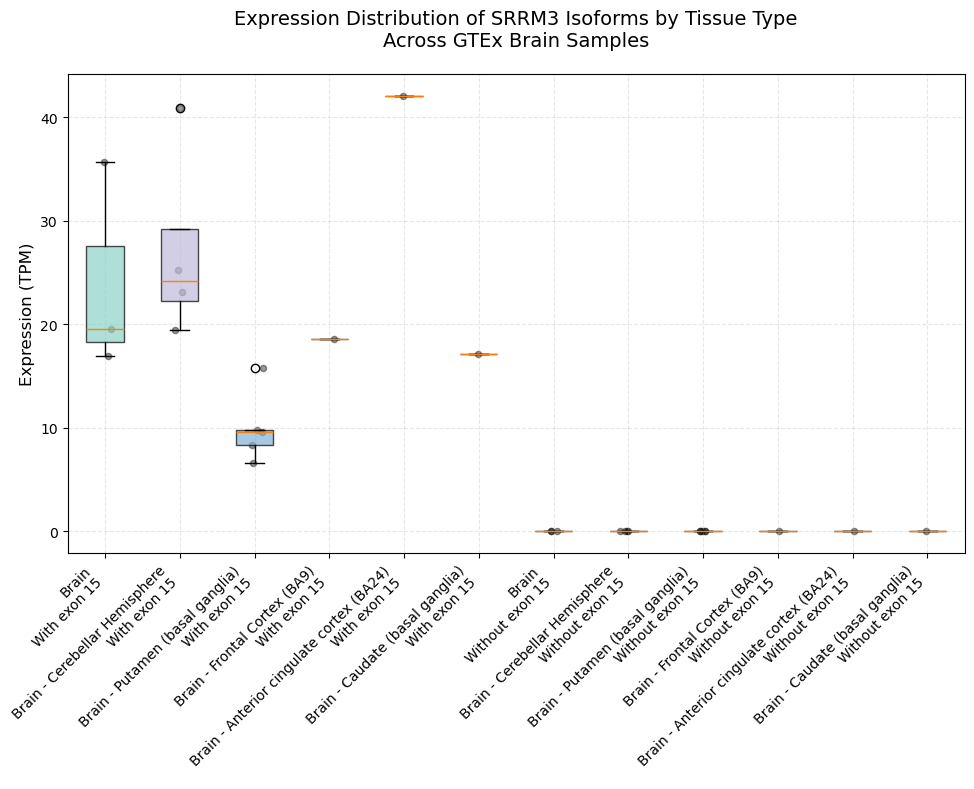

In [75]:
# Create a figure and axis with a larger size for better visibility
plt.figure(figsize=(10, 8))

# Get data for both transcripts from adata object
with_exon15_data = adata[:, with_exon15].X.toarray().flatten()
without_exon15_data = adata[:, without_exon15].X.toarray().flatten()

# Get tissue types for coloring
tissue_types = adata.obs['tissue_type'].unique()
tissue_colors = plt.cm.Set3(np.linspace(0, 1, len(tissue_types)))
tissue_color_dict = dict(zip(tissue_types, tissue_colors))

# Create lists to store data by tissue type
with_exon15_by_tissue = []
without_exon15_by_tissue = []
labels = []

# Split data by tissue type
for tissue in tissue_types:
    tissue_mask = adata.obs['tissue_type'] == tissue
    with_exon15_by_tissue.append(adata[tissue_mask, with_exon15].X.toarray().flatten())
    without_exon15_by_tissue.append(adata[tissue_mask, without_exon15].X.toarray().flatten())

# Create labels and data in the desired order (all with exon15 first, then all without)
data = []
colors = []
labels = []

# Add all with_exon15 data first
for i, tissue in enumerate(tissue_types):
    data.append(with_exon15_by_tissue[i])
    colors.append(tissue_color_dict[tissue])
    labels.append(f"{tissue}\nWith exon 15")

# Then add all without_exon15 data
for i, tissue in enumerate(tissue_types):
    data.append(without_exon15_by_tissue[i])
    colors.append(tissue_color_dict[tissue])
    labels.append(f"{tissue}\nWithout exon 15")

# Create boxplot
positions = np.arange(1, len(data) + 1)
bp = plt.boxplot(data, patch_artist=True, tick_labels=labels, positions=positions)

# Customize boxplot colors
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Add individual points with jitter
for i, d in enumerate(data, 1):
    x = np.random.normal(i, 0.04, size=len(d))
    plt.scatter(x, d, alpha=0.4, s=20, color='black')

# Customize plot appearance
plt.ylabel('Expression (TPM)', fontsize=12)
plt.title('Expression Distribution of SRRM3 Isoforms by Tissue Type\nAcross GTEx Brain Samples', fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print summary statistics by tissue type
# print("\nSummary Statistics by Tissue Type:")
# for i, tissue in enumerate(tissue_types):
#     print(f"\n{tissue}:")
#     print("With exon 15:")
#     print(f"Mean: {np.mean(with_exon15_by_tissue[i]):.2f}")
#     print(f"Median: {np.median(with_exon15_by_tissue[i]):.2f}")
#     print(f"Std: {np.std(with_exon15_by_tissue[i]):.2f}")
    
#     print("\nWithout exon 15:")
#     print(f"Mean: {np.mean(without_exon15_by_tissue[i]):.2f}")
#     print(f"Median: {np.median(without_exon15_by_tissue[i]):.2f}")
#     print(f"Std: {np.std(without_exon15_by_tissue[i]):.2f}")

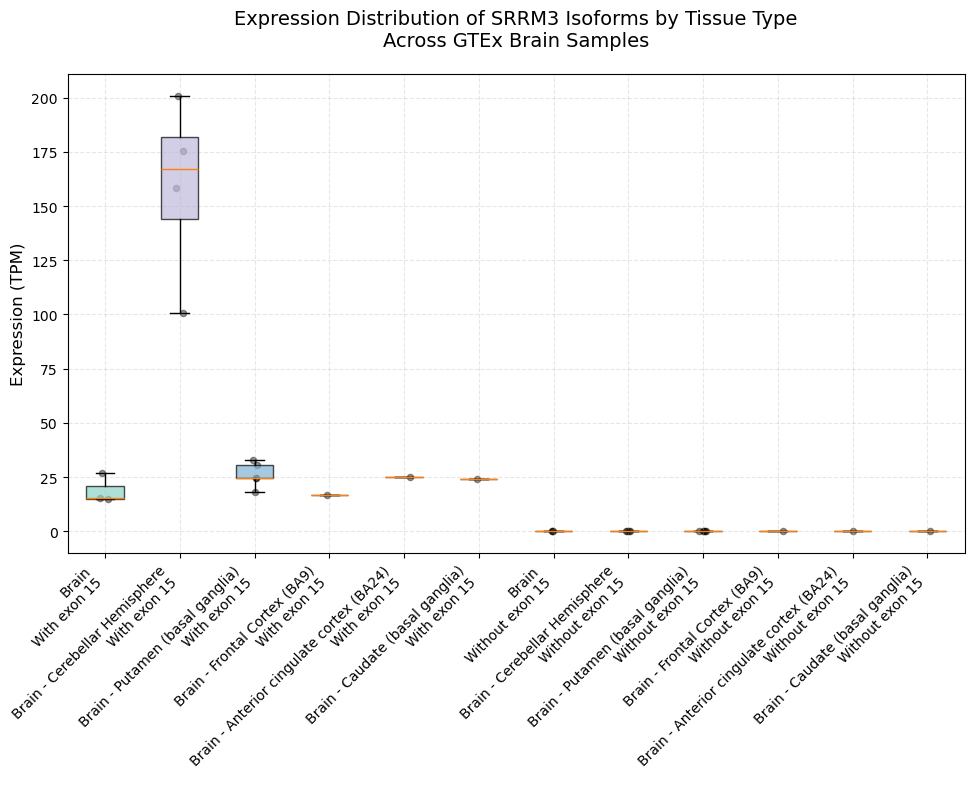

In [78]:
# Create a figure and axis with a larger size for better visibility
plt.figure(figsize=(10, 8))

# Get data for both transcripts from adata object
with_exon15_data = adata[:, "ENST00000611745.1"].X.toarray().flatten()
without_exon15_data = adata[:, "ENST00000612155.1"].X.toarray().flatten()

# Get tissue types for coloring
tissue_types = adata.obs['tissue_type'].unique()
tissue_colors = plt.cm.Set3(np.linspace(0, 1, len(tissue_types)))
tissue_color_dict = dict(zip(tissue_types, tissue_colors))

# Create lists to store data by tissue type
with_exon15_by_tissue = []
without_exon15_by_tissue = []
labels = []

# Split data by tissue type
for tissue in tissue_types:
    tissue_mask = adata.obs['tissue_type'] == tissue
    with_exon15_by_tissue.append(adata[tissue_mask, "ENST00000611745.1"].X.toarray().flatten())
    without_exon15_by_tissue.append(adata[tissue_mask, "ENST00000612155.1"].X.toarray().flatten())

# Create labels and data in the desired order (all with exon15 first, then all without)
data = []
colors = []
labels = []

# Add all with_exon15 data first
for i, tissue in enumerate(tissue_types):
    data.append(with_exon15_by_tissue[i])
    colors.append(tissue_color_dict[tissue])
    labels.append(f"{tissue}\nWith exon 15")

# Then add all without_exon15 data
for i, tissue in enumerate(tissue_types):
    data.append(without_exon15_by_tissue[i])
    colors.append(tissue_color_dict[tissue])
    labels.append(f"{tissue}\nWithout exon 15")

# Create boxplot
positions = np.arange(1, len(data) + 1)
bp = plt.boxplot(data, patch_artist=True, tick_labels=labels, positions=positions)

# Customize boxplot colors
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Add individual points with jitter
for i, d in enumerate(data, 1):
    x = np.random.normal(i, 0.04, size=len(d))
    plt.scatter(x, d, alpha=0.4, s=20, color='black')

# Customize plot appearance
plt.ylabel('Expression (TPM)', fontsize=12)
plt.title('Expression Distribution of SRRM3 Isoforms by Tissue Type\nAcross GTEx Brain Samples', fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print summary statistics by tissue type
# print("\nSummary Statistics by Tissue Type:")
# for i, tissue in enumerate(tissue_types):
#     print(f"\n{tissue}:")
#     print("With exon 15:")
#     print(f"Mean: {np.mean(with_exon15_by_tissue[i]):.2f}")
#     print(f"Median: {np.median(with_exon15_by_tissue[i]):.2f}")
#     print(f"Std: {np.std(with_exon15_by_tissue[i]):.2f}")
    
#     print("\nWithout exon 15:")
#     print(f"Mean: {np.mean(without_exon15_by_tissue[i]):.2f}")
#     print(f"Median: {np.median(without_exon15_by_tissue[i]):.2f}")
#     print(f"Std: {np.std(without_exon15_by_tissue[i]):.2f}")

# Legacy code

In [15]:
# def analyze_expression(flair_tpm: str, transcript_sets: Tuple[List[str], List[str]]) -> pd.DataFrame:
#     """
#     Analyze expression of strictly filtered transcripts
#     """
#     print("\nAnalyzing expression patterns...")
    
#     # Read TPM data
#     tpm_data = pd.read_csv(flair_tpm, sep='\t')
    
#     with_exon15, without_exon15 = transcript_sets
#     all_transcripts = with_exon15 + without_exon15
    
#     if not all_transcripts:
#         print("No transcripts found matching strict criteria.")
#         return None
    
#     # Filter for our transcripts
#     srrm3_data = tpm_data[tpm_data['transcript'].isin(all_transcripts)].copy()
    
#     # Add classification
#     srrm3_data['isoform_type'] = np.where(
#         srrm3_data['transcript'].isin(with_exon15),
#         'with_exon15 (16 exons)',
#         'without_exon15 (15 exons)'
#     )
    
#     # Calculate summary statistics
#     summary = srrm3_data.melt(
#         id_vars=['transcript', 'isoform_type'],
#         var_name='sample',
#         value_name='TPM'
#     ).groupby(['isoform_type']).agg({
#         'TPM': ['mean', 'median', 'std', 'min', 'max', 'count']
#     })
    
#     print("\nExpression Summary:")
#     print("=" * 50)
#     print(summary)
    
#     return srrm3_data

# def plot_expression(expression_data: pd.DataFrame, transcript_sets: Tuple[List[str], List[str]]):
#     """
#     Create visualization for expression patterns
#     """
#     if expression_data is None or expression_data.empty:
#         return
    
#     plt.figure(figsize=(10, 6))
#     melted_data = expression_data.melt(
#         id_vars=['transcript', 'isoform_type'],
#         var_name='sample',
#         value_name='TPM'
#     )
    
#     # Create violin plot
#     sns.violinplot(data=melted_data, x='isoform_type', y='TPM')
#     plt.title('SRRM3 Isoform Expression Distribution\n(Strict Filtering)')
#     plt.xlabel('Isoform Type')
#     plt.ylabel('TPM (log scale)')
#     plt.yscale('log')
    
#     # Rotate x-axis labels for better readability
#     plt.xticks(rotation=45)
#     plt.tight_layout()
    
#     return plt.gcf()